# Simple Neural Network in Python using TensorFlow

In [2]:
# %pip install pandas seaborn scikit-learn tensorflow

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## Steps before Creating a Neural Network (Preprocess the Data)

In [3]:
#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
titanic.dropna(subset=['age', 'embarked'], inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train.shape[1]

18

In [5]:
# Building the model

# define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

# combine the layers into a model
model = tf.keras.models.Sequential([input_layer, 
                                    # hidden_layer, 
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [6]:
%%time
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3969 - loss: 1.0513
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3939 - loss: 0.9436
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4845 - loss: 0.8896
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5447 - loss: 0.8239
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6157 - loss: 0.7293 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5941 - loss: 0.6636
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6321 - loss: 0.6283
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6607 - loss: 0.6138
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6819 - loss: 0.5893 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7280 - loss: 0.5532
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7378 - loss: 0.5445  
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accur

In [7]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7727 - loss: 0.4914 
Test Accuracy: 0.7622377872467041
Test Loss: 0.532279908657074


## Let's see all the steps in action within one snippet of code

In [8]:
%%time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
titanic.dropna(subset=['age', 'embarked'], inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

model = tf.keras.models.Sequential([input_layer, 
                                    # hidden_layer, 
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4158 - loss: 0.8349
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6185 - loss: 0.8199
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6475 - loss: 0.6876  
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6794 - loss: 0.7057
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7049 - loss: 0.6250 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7464 - loss: 0.5945 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7667 - loss: 0.5552 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8251 - loss: 0.5058 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8079 - loss: 0.4971 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7873 - loss: 0.5027 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 0.4843 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8212 - loss: 0.3653 - val_accuracy: 0.8421 - val_loss: 0.3624
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8291 - loss: 0.3736 - val_accuracy: 0.8509 - val_loss: 0.3647
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8493 - loss: 0.3229 - val_accuracy: 0.8509 - val_loss: 0.3680
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8223 - loss: 0.3664 - val_accuracy: 0.8509 - val_loss: 0.3715
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8569 - loss: 0.3238 - val_accuracy: 0.8509 - val_loss: 0.3715
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8406 - loss: 0.3342 - val_accuracy: 0.8509 - val_loss: 0.3725
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8334 - loss: 0.3654 - val_accuracy: 0.8509 - val_loss: 0.3721
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8553 - loss: 0.3445 - val_accuracy: 0.

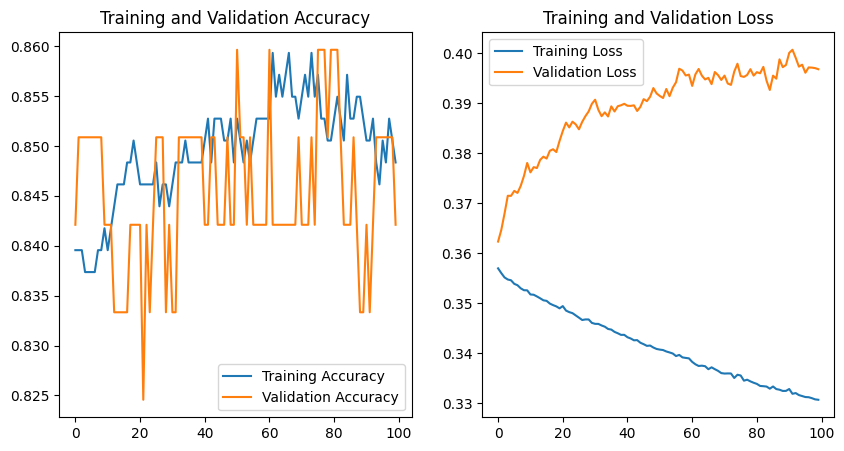

In [9]:
# Assuming 'history' is the result of model.fit()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Plot the Training and Validation Accuracy and Loss for each epoch
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')  
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

---